<a href="https://colab.research.google.com/github/ShlomiShorIII/GoalMeterics/blob/main/Goal_Meterics__Shlomi_Shor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

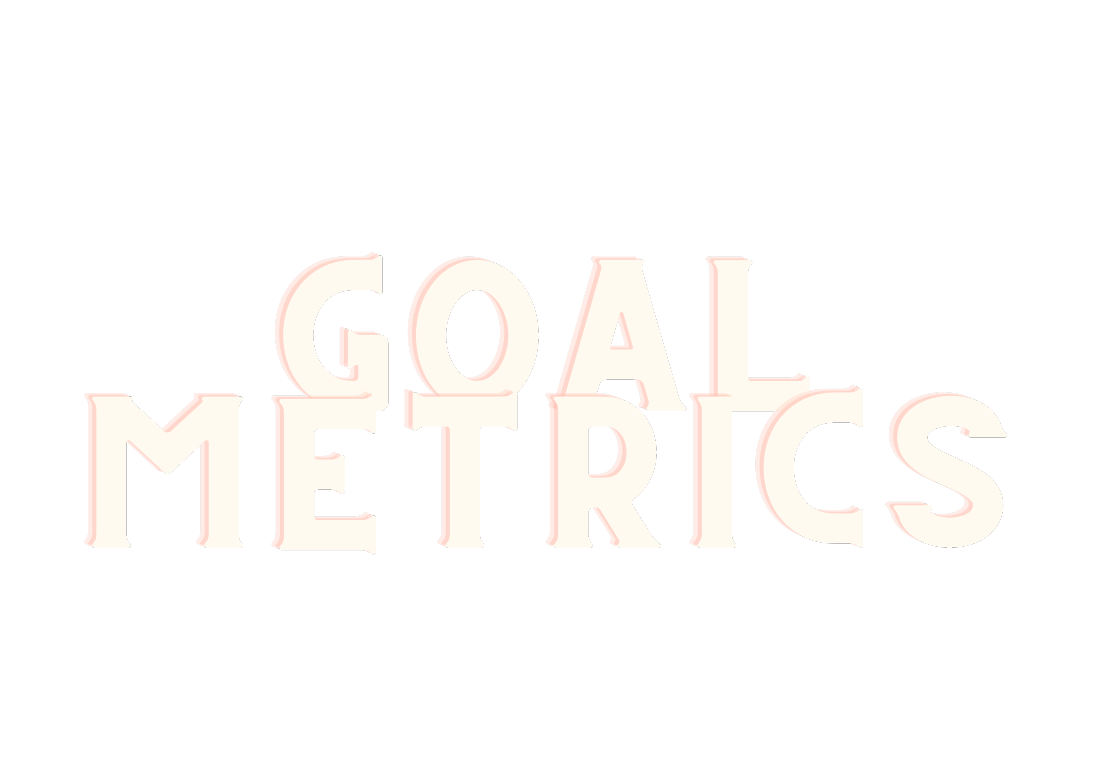

# ***Shlomi Shor - 316328236***

# ***Stage 1 - Intorduction***

# **API**

We chose to use the API from soccer-data-ai. https://pypi.org/project/soccer-data-api/


In [ ]:
%%capture
!pip3 install soccer-data-api

In [ ]:
# פקודה שטוענת את הנתונים מתוך האי.פי.איי ומחזירה את הנתונים שקיימים במחלקה
from soccer_data_api import SoccerDataAPI # יוצר גישה לאי.פי.איי
api = SoccerDataAPI() #class
help(api) #בודק את המחלקה

Help on SoccerDataAPI in module soccer_data_api.soccer_api object:

class SoccerDataAPI(builtins.object)
 |  A class that returns the stats of selected leagues.
 |  ...
 |  Methods:
 |  -------
 |  <league>: Gets stats (team name, points, matches played, wins, losses, draws, top scorers, goal diff number)
 |  of selected league
 |  
 |  Methods defined here:
 |  
 |  __init__(self)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  bundesliga(self)
 |  
 |  english_championship(self)
 |  
 |  english_premier(self)
 |  
 |  eredivisie(self)
 |  
 |  la_liga(self)
 |  
 |  ligue_1(self)
 |  
 |  russian_premier(self)
 |  
 |  serie_a(self)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [ ]:
# אתחול של האי.פי.אי
soccer_data = SoccerDataAPI() #class

In [ ]:
# פקודה שמדפיסה את הנתונים של הקבוצה הראשונה בליגה הספרדית
# עשינו זאת כדי להבין איך נקראים הנתונים בתוך הספרייה של האי.פי.איי
league_data = soccer_data.la_liga()
print(league_data[0])

{'team': 'Barcelona', 'pos': '1', 'points': '18', 'matches_played': '7', 'wins': '6', 'draws': '6', 'losses': '0', 'goals_for': '22', 'goals_against': '5', 'goal_diff': '+17', 'top_scorer': 'Robert Lewandowski - 6'}


# **New Code**

In [ ]:
# קישור של הקובץ מהדרייב לגוגל קולאב והגדרת השם שלו
!wget -O leagues.txt "https://drive.google.com/uc?export=download&id=1hZeuqc60PbDvqEAu_t0Iz6r9uzokr8be"

--2024-09-25 08:01:26--  https://drive.google.com/uc?export=download&id=1hZeuqc60PbDvqEAu_t0Iz6r9uzokr8be
Resolving drive.google.com (drive.google.com)... 74.125.134.139, 74.125.134.138, 74.125.134.102, ...
Connecting to drive.google.com (drive.google.com)|74.125.134.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1hZeuqc60PbDvqEAu_t0Iz6r9uzokr8be&export=download [following]
--2024-09-25 08:01:26--  https://drive.usercontent.google.com/download?id=1hZeuqc60PbDvqEAu_t0Iz6r9uzokr8be&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.141.132, 2607:f8b0:400c:c06::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.141.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49 [application/octet-stream]
Saving to: ‘leagues.txt’

leagues.txt         100%[===================>]      49  --.-KB/s    in 0s      

In [ ]:
# המשתמש מכניס את הליגות שבהם מעוניין דרך קובץ טקסט

with open('leagues.txt', 'rt', encoding='utf-8-sig') as file:
    leagues_string = file.readline()

def load_league(league_str):
  if league_str=='Seria A':
    return soccer_data.serie_a()
  elif league_str=='Premier League':
    return soccer_data.english_premier()
  elif league_str=='Bundesliga':
    return soccer_data.bundesliga()
  elif league_str=='La Liga':
    return soccer_data.la_liga()
  elif league_str=='Ligue 1':
    return soccer_data.ligue_1()
  elif league_str=='English Second Division':
    return soccer_data.english_championship()
  elif league_str=='Russian Premier':
    return soccer_data.russian_premier()
  elif league_str=='Eredivisie':
    return soccer_data.eredivisie()

# פונקציה שקוראת את קובץ הטקסט ולאחר מכן שומרת את שמות הליגות בתוך היומן
# הפונקציה מזהה את שמות הליגות על ידי הפרדה של פסיקים

def load_user_leagues(leagues_string):
  user_leagues = leagues_string.split(',')
  loaded_leagues = {}
  for league in user_leagues:
    loaded_leagues[league]=load_league(league)
  return loaded_leagues

loaded_leagues= load_user_leagues(leagues_string)
print (loaded_leagues.keys()) #מדפיס את המפתחות של המילון במקרה זה שמות הליגות

dict_keys(['Seria A', 'La Liga', 'Ligue 1', 'Premier League', 'Bundesliga'])


**Functions + Commnads**

In [ ]:
#פוקנציה שמחברת את כמות הגולים שהובקעו בליגה שהמשתמש בחר
# הפונקציה עוברת על כל הקבוצות בדאטה של הליגות ועבור כל כל קבוצה לוקחת את הנתון של כמות הגולים שהבקיעה ומוסיפה לטוטאל גולס
# הפונקציה מחזירה את הערך

def calculate_total_goals(league_data):
    total_goals = 0
    for team in league_data:
        total_goals += int(team['goals_for'])
    return total_goals

loaded_leagues = load_user_leagues(leagues_string)

total_goals = {}
for league in loaded_leagues:
  total_goals[league]= calculate_total_goals(loaded_leagues[league])

# הסבר על loaded_leagues[league]:
# שם הליגה נותן גישה מלאה לכל הנתונים על אותה הליגה

for key in total_goals:
  print ('Total goals in ' + key + ':' + str(total_goals[key])) #עבור כל מפתח בטוטאל גולס להדפיס את כמות הגולים

Total goals in Seria A:130
Total goals in La Liga:170
Total goals in Ligue 1:149
Total goals in Premier League:136
Total goals in Bundesliga:126


In [ ]:
#פקודה שהמשתמש מכניס שם של קבוצה ומקבל את כל הסטטיסטיקות של הקבוצה

from prettytable import PrettyTable

def get_team_statistics(team_name, loaded_leagues): #שם הקבוצה זה פרמטר שאותו מחפשים בתוך הליגות הטעונות
    league_functions = list(loaded_leagues.keys())
    normalized_team_name = team_name.strip().lower()

    for league_func in league_functions:
        league_data = loaded_leagues.get(league_func, [])
        for team in league_data: #לולאה שעוברת על כל הקבוצות בליגות שנטענו
            if team.get('team', '').strip().lower() == normalized_team_name:
                print(f"Found {team_name} in {league_func.replace('_', ' ').title()}:")
                table = PrettyTable() # יצירת טבלה
                table.field_names = ["Statistic", "Value"] #הגדרת הערכים של הטבלה
                for key, value in team.items():
                    table.add_row([key, value]) #מוסיף שורה לטבלה של המפתח והערך
                print(table)
                return

    print(f"Team '{team_name}' not found in the searched leagues.")

team_name_input = input("Enter the name of the team: ") #קבלת קלט מהמשתמש
get_team_statistics(team_name_input, loaded_leagues) # הפעלת הפונקציה על השם שהמשתמש הכניס הליגות שטעונות

Enter the name of the team: Arsenal
Found Arsenal in Premier League:
+----------------+------------------------------------+
|   Statistic    |               Value                |
+----------------+------------------------------------+
|      team      |              Arsenal               |
|      pos       |                 4                  |
|     points     |                 11                 |
| matches_played |                 5                  |
|      wins      |                 3                  |
|     draws      |                 3                  |
|     losses     |                 0                  |
|   goals_for    |                 8                  |
| goals_against  |                 3                  |
|   goal_diff    |                 +5                 |
|   top_scorer   | Kai Havertz, Gabriel Magalhães - 2 |
+----------------+------------------------------------+


In [ ]:
#פונקציה שמציגה את טבלאות הליגה שהמשתמש בחר

from prettytable import PrettyTable
from soccer_data_api import SoccerDataAPI

# פוקנציה לבניית טבלה של כל ליגה פעם אחת
def league_table(league_data,league):
    table = PrettyTable(["Team Name", "Place", "Points"])
    league_data = league_data[league]

    for team in league_data: #עבור כל קבוצה בליגה יש שם, מקום וכמות נקודות
        team_name = team['team']
        place = team['pos']
        points = team['points']
        table.add_row([team_name, place, points])

    print(table)

def all_leagues_tables(league_data):
  for league in league_data:
    league_table(league_data,league)

all_leagues_tables(loaded_leagues)

+---------------+-------+--------+
|   Team Name   | Place | Points |
+---------------+-------+--------+
|     Torino    |   1   |   11   |
|     Napoli    |   2   |   10   |
|    Udinese    |   3   |   10   |
|    Juventus   |   4   |   9    |
|     Empoli    |   5   |   9    |
|     Inter     |   6   |   8    |
|     Milan     |   7   |   8    |
|     Lazio     |   8   |   7    |
|      Roma     |   9   |   6    |
| Hellas Verona |   10  |   6    |
|   Fiorentina  |   11  |   6    |
|    Atalanta   |   12  |   6    |
|    Bologna    |   13  |   6    |
|     Parma     |   14  |   5    |
|      Como     |   15  |   5    |
|     Genoa     |   16  |   5    |
|     Lecce     |   17  |   5    |
|    Venezia    |   18  |   4    |
|     Monza     |   19  |   3    |
|    Cagliari   |   20  |   2    |
+---------------+-------+--------+
+-----------------+-------+--------+
|    Team Name    | Place | Points |
+-----------------+-------+--------+
|    Barcelona    |   1   |   18   |
|   Real Mad

In [ ]:
#פוקנציה שעוברת על כל הליגות ומוציאה את הקבוצה עם הכי הרבה גולים

def most_goals(league_data):
    top_team = ''
    max_goal = 0
    goals_team = {}
    for team in league_data:
        if 'goals_for' in team:
            team_name = team['team']
            alot_goals = int(team['goals_for'])

            if alot_goals > max_goal:
                max_goal = alot_goals
                top_team = team_name
    goals_team[top_team] = max_goal
    return goals_team #מחזיר את המילון

def best_teams():
  best_teams = {} #יצירת מילון חדש
  for league_teams in loaded_leagues:
    best_teams[league_teams] = most_goals(loaded_leagues[league_teams]) #השורה הזו מוצאת את הקבוצה עם הכי הרבה גולים ומתעדת את המידע בתוך המילון, המפתח הוא שם הליגה והערך הוא שם הקבוצה וכמות הגולים
  return best_teams

for league_teams in loaded_leagues:
  print("The team with the most goals in " + league_teams + " is: "+ str(most_goals(loaded_leagues[league_teams])))

print(best_teams().keys())
print(best_teams().values())

The team with the most goals in Seria A is: {'Milan': 11}
The team with the most goals in La Liga is: {'Barcelona': 22}
The team with the most goals in Ligue 1 is: {'Paris S-G': 17}
The team with the most goals in Premier League is: {'Manchester City': 13}
The team with the most goals in Bundesliga is: {'Bayern Munich': 16}
dict_keys(['Seria A', 'La Liga', 'Ligue 1', 'Premier League', 'Bundesliga'])
dict_values([{'Milan': 11}, {'Barcelona': 22}, {'Paris S-G': 17}, {'Manchester City': 13}, {'Bayern Munich': 16}])


In [ ]:
# פונקציה שמחזירה את מלכי השערים בליגות שהמשתמש בחר

def top_scorer(league_data):
  Top_scores = {}
  for league in league_data:
    footballer_name = ""
    f_goals = 0
    for team in league_data[league]:
      if 'top_scorer' in team:
        if ' - ' in team['top_scorer']:
          top_footballer = team['top_scorer'].split(' - ')[0]
          footballer_goals = int(team['top_scorer'].split(' - ')[1])
        if footballer_goals > f_goals:
          f_goals = footballer_goals
          footballer_name = top_footballer
    Top_scores[league] = (footballer_name,f_goals)
  return Top_scores
top_scores = top_scorer(loaded_leagues)
for league, (footballer_name, f_goals) in top_scores.items():
    print(f"The player with the most goals in {league} is: {footballer_name} with {f_goals} goals.")



The player with the most goals in Seria A is: Marcus Thuram with 4 goals.
The player with the most goals in La Liga is: Robert Lewandowski with 6 goals.
The player with the most goals in Ligue 1 is: Mason Greenwood with 5 goals.
The player with the most goals in Premier League is: Erling Haaland with 10 goals.
The player with the most goals in Bundesliga is: Harry Kane with 5 goals.


In [ ]:
# פוקנציה שמציגה את כמות הקבוצות בליגה

def count_teams_in_leagues(league_data):
  team_counts = {} #יומן חדש שבו נשים את שם הליגה וכמות הקבוצות
  for league in league_data:
     team_counts[league] = len(league_data[league])
  return team_counts

team_counts = count_teams_in_leagues(loaded_leagues)
for league, count in team_counts.items():
    print(f"The count of teams in {league} is: {count}")


The count of teams in Seria A is: 20
The count of teams in La Liga is: 20
The count of teams in Ligue 1 is: 20
The count of teams in Premier League is: 20
The count of teams in Bundesliga is: 18


# **Graphs**

In [ ]:
#התקנה של הספרייה, ספרייה זו יוצרת הדמיות סטטיסטיות ואינטרקטיביות כמו גרפים, עוגות, מפות וכו'
%%capture
!pip install matplotlib

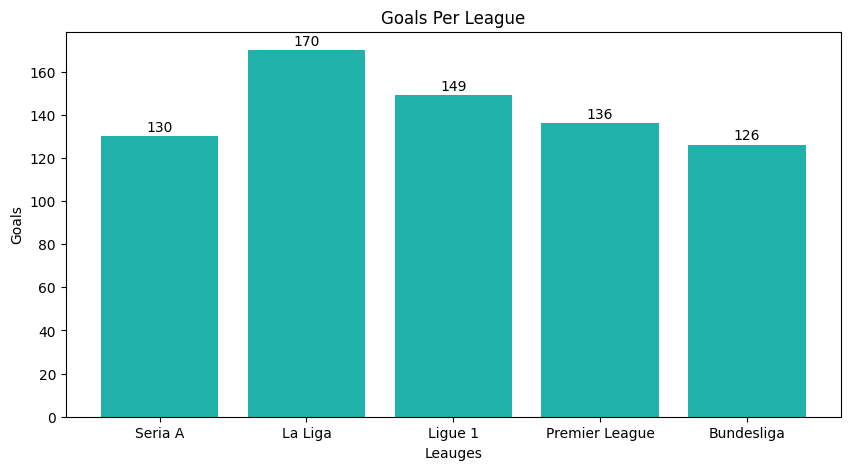

In [ ]:
#גרף שמציג את כמות הגולים בכל ליגה
# הקוד יוצר תרשים עמודים
import matplotlib.pyplot as plt

keys = list(total_goals.keys()) #מאחזר את שמות הליגות מתוך המילון כרשימה
values = list(total_goals.values()) # מאחזר כמות הגולים מתוך המילון כרשימה

plt.figure(figsize=(10, 5)) #מגדיר את הגודל של הגרף
bars = plt.bar(keys, values, color='lightseagreen') #מגדיר את הערכים שבגרף
for bar in bars:
    yval = bar.get_height() #מקבל את גובה הגרךף עבור כל עמודה
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, yval, ha='center', va='bottom') #מציב את הטקסט מעל העמודה
plt.xlabel('Leauges') # ציר האיקס - ליגות
plt.ylabel('Goals') # ציר הוואי - כמות גולים
plt.title('Goals Per League') # שם של הגרף
plt.show()

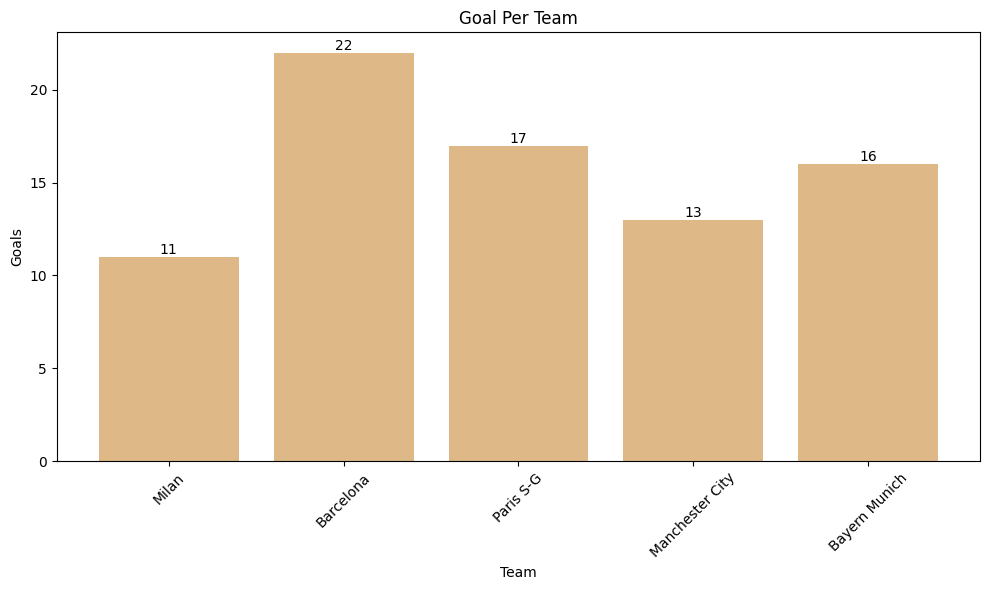

In [ ]:
#גרף שמציג השוואה בין הקבוצות שהכניסו הכי הרבה גולים בין כל הליגות

import matplotlib.pyplot as plt

values_list = list(best_teams().values()) #מפעיל את הפונקציה הקבוצה הטובה ומביאה את הערכים שהם כמות הגולים ושם הקבוצה
teams = [] #רשימה לשמות הקבוצות
goals = [] #רשימה לכמות הגולים

for item in values_list:
    for team, goal in item.items():
        teams.append(team) #מוסיף את שם הקבוצה לרשימה
        goals.append(goal) # מוסיף את כמות הגולים לרשימה

plt.figure(figsize=(10, 6))
bars = plt.bar(teams, goals, color='burlywood')

for bar, point in zip(bars, goals):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{point}', ha='center', va='bottom')

plt.xlabel('Team')
plt.ylabel('Goals')
plt.title('Goal Per Team')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

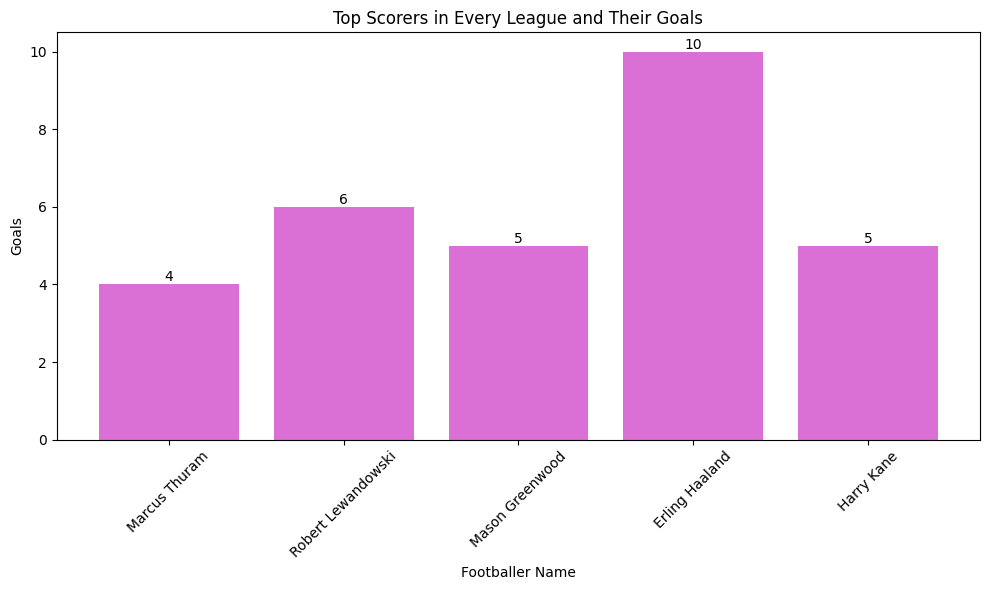

In [ ]:
# גרף שמציג את מלך השערים מכל ליגה

import matplotlib.pyplot as plt

top_scores = top_scorer(loaded_leagues) #קוראת לפונקציה טופ_סקורר בעל הליגות שנטענו ומאחסן את זה כטופ_סקוררס

scorer_names = [] #רשימה חדשה לשמות השחקנים
scorer_goals = [] #רשימה חדשה לכמות הגולים

for league, (name, goals) in top_scores.items(): #עבור כל משתנה המילון של טופ סקורס נקבל את המפתח שם ליגה והערכים שם השחקן וכמות הגולים, הלולאה מפצלת את הערך
    scorer_names.append(name) #מוסיף לרשימה את שם השחקן
    scorer_goals.append(goals) #מוסיף לרישמה את כמות הגולים

plt.figure(figsize=(10, 6))
bars = plt.bar(scorer_names, scorer_goals, color='orchid')

for bar, goal in zip(bars, scorer_goals):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{goal}', ha='center', va='bottom')

plt.xlabel('Footballer Name')
plt.ylabel('Goals')
plt.title('Top Scorers in Every League and Their Goals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

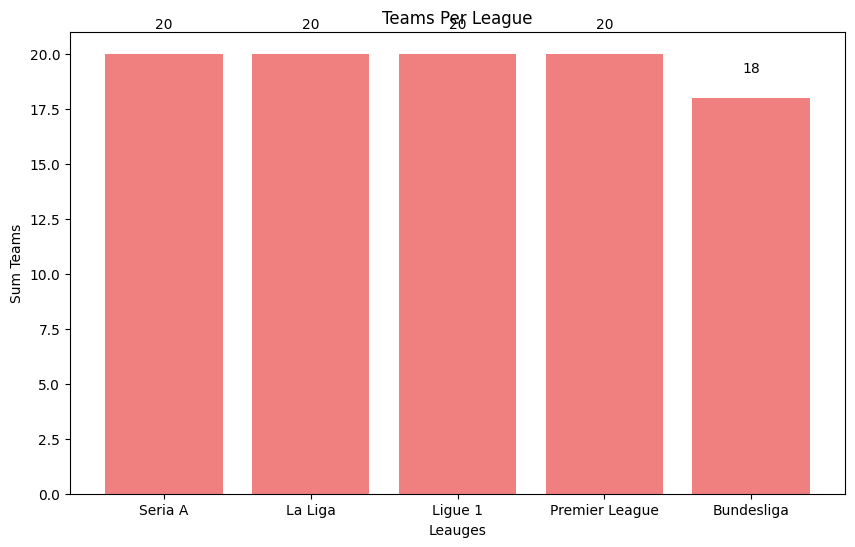

In [ ]:
# גרף שמציג את סך הקבוצות בכל ליגה

import matplotlib.pyplot as plt

keys = list(team_counts.keys()) #רשימה חדשה שהערכים בה הם שמות הליגות
values = list(team_counts.values()) #רשימה חדשה שהערכים בה הם כמות הקבוצות

plt.figure(figsize=(10, 6))
bars = plt.bar(keys, values, color='lightcoral')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, yval, ha='center', va='bottom')
plt.xlabel('Leauges')
plt.ylabel('Sum Teams')
plt.title('Teams Per League')
plt.show()

# **Generate an output text file**

In [ ]:
# הפיכת הטבלאות של הליגות לקובץ csv

import csv #מייבא את המודל לקריאה של קבצים ולהפוך אותם לקבצי סי.אס.וי
from google.colab import files #ניתן להוריד למחשב קבצים מהגוגל קולאב

#הפוקנציה שומרת כל ליגה בודדת כקובץ סי.אס.וי
def save_league_table_to_csv(league_data, league):
    filename = f"{league.replace(' ', '_')}_table.csv" #יוצר קובץ שמחליף את שם הליגה שבמקום רווח יהיה מקף תחתון
    with open(filename, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile) # שורה זו ממירה נתונים מקובץ פייתון לקובץ סי.אס.וי
        writer.writerow(["Team Name", "Place", "Points"])

        for team in league_data[league]: #עבור כל קבוצה מליגות שנטענו
        #שמירת הנתונים וכיתבתם כשורה חדשה
            team_name = team['team']
            place = team['pos']
            points = team['points']
            writer.writerow([team_name, place, points])

    print(f"Table for {league} saved to {filename}")
    return filename

# פונקציה ששומרת את הטבלאות של כל הליגות כקובץ csv
# הפונקציה שומרת את כל הקבצים בתור רשימה ואז מחזירה אותם כקבצים נפרדים
def save_all_leagues_tables_to_csv(league_data):
    filenames = []
    for league in league_data:
        filename = save_league_table_to_csv(league_data, league) #הפעלה של הפוקנציה על נתוני הליגות עבור כל ליגה
        filenames.append(filename)
    return filenames

filenames = save_all_leagues_tables_to_csv(loaded_leagues)

# מוריד את הקבצים מהגוגל קולאב
for filename in filenames:
    files.download(filename)

Table for Seria A saved to Seria_A_table.csv
Table for La Liga saved to La_Liga_table.csv
Table for Ligue 1 saved to Ligue_1_table.csv
Table for Premier League saved to Premier_League_table.csv
Table for Bundesliga saved to Bundesliga_table.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# קובץ טקסט שמציג את השחקן עם הכי הרבה גולים בכל ליגה

import csv

def save_top_scorers_summary_to_txt(top_scores, filename="top_scorers_summary.txt"):
    #רושם בתוך קובץ הטקסט עבור כל ליגה את שם מלך השערים וכמות הגולים
    with open(filename, 'w') as txtfile:
        for league, (footballer_name, f_goals) in top_scores.items(): #עבור כל ליגה מפרק מהיומן את שם הליגה, מלך השערים וכמות הגולים
            summary = f"The player with the most goals in {league} is: {footballer_name} with {f_goals} goals.\n" #כותב מחרוזת ויורד שורה
            txtfile.write(summary)

    print(f"Top scorers summary saved to {filename}")

top_scores = top_scorer(loaded_leagues)
save_top_scorers_summary_to_txt(top_scores)

from google.colab import files #הורדת הקובץ

filename = "top_scorers_summary.txt"
files.download(filename)

Top scorers summary saved to top_scorers_summary.txt


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>